# Customer Churn Prediction Notebook

## Introduction

This Jupyter Notebook aims to address the customer churn prediction problem using machine learning techniques. We will explore a dataset containing historical customer information, usage patterns, and churn labels. By developing a binary classification model, we intend to predict whether a customer is likely to churn or not, based on the provided features.

## Problem Statement

The main goal of this project is to build a predictive model that can identify potential churners among the customer base. Churn prediction has direct implications for business strategies and decision-making. By identifying customers who are at risk of leaving, companies can take targeted actions to retain them, such as offering personalized discounts, enhancing customer support, or improving product offerings.

## Data Sources

The dataset used for this analysis consists of customer-related features, historical usage data, and a binary churn label. It was given by Sunbase.

## Libraries and Dependencies

To perform this analysis, we will utilize several Python libraries, including:

- pandas: for data manipulation and preprocessing.
- numpy: for numerical computations.
- scikit-learn: for machine learning algorithms, model evaluation, and preprocessing techniques.
- matplotlib and seaborn: for data visualization.
- XGBoost: for applying XGBoost alogorithm.

**I've prepared a brief PDF report summarizing the key findings from this analysis. If you're looking for a quick overview of the project, you view the PDF report**

# import essential library

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# load data and print description

In [11]:
# Load the data from the Excel file
file_path = "/content/customer_churn_large_dataset.xlsx"
data_df = pd.read_excel(file_path)

In [12]:
data_df.head()

CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5  Customer_5   46  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                          17         73.36             236      0  
1                           1         48.76             172      0  
2                           5         85.47             460      0  
3                           3         97.94             297      1  
4                          19         58.14             266      0

In [13]:
data_df.describe()

CustomerID            Age  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean    50000.500000      44.027020                   12.490100   
std     28867.657797      15.280283                    6.926461   
min         1.000000      18.000000                    1.000000   
25%     25000.750000      31.000000                    6.000000   
50%     50000.500000      44.000000                   12.000000   
75%     75000.250000      57.000000                   19.000000   
max    100000.000000      70.000000                   24.000000   

        Monthly_Bill  Total_Usage_GB          Churn  
count  100000.000000   100000.000000  100000.000000  
mean       65.053197      274.393650       0.497790  
std        20.230696      130.463063       0.499998  
min        30.000000       50.000000       0.000000  
25%        47.540000      161.000000       0.000000  
50%        65.010000      274.000000       0.000000  
75%        82.640000      387.000000       1.000000  
max       100.000000      500.000000       1.000000

- **Age**: Average age is around 44, ranging from 18 to 70.
- **Subscription Length**: Average is about 12.5 months, with a range from 1 to 24 months.
- **Monthly Bill**: Average bill is approximately 65, varying from 30 to 100.
- **Total Usage**: Average usage is around 274 GB, ranging from 50 to 500 GB.
- **Churn**: About half the entries are labeled as churn (1), and half are not (0).

In [14]:
# # Assuming
# data_df.to_csv('churn.csv', index=False)

In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


# EDA (Exploratory Data Analysis)

## Continuous variable distribution

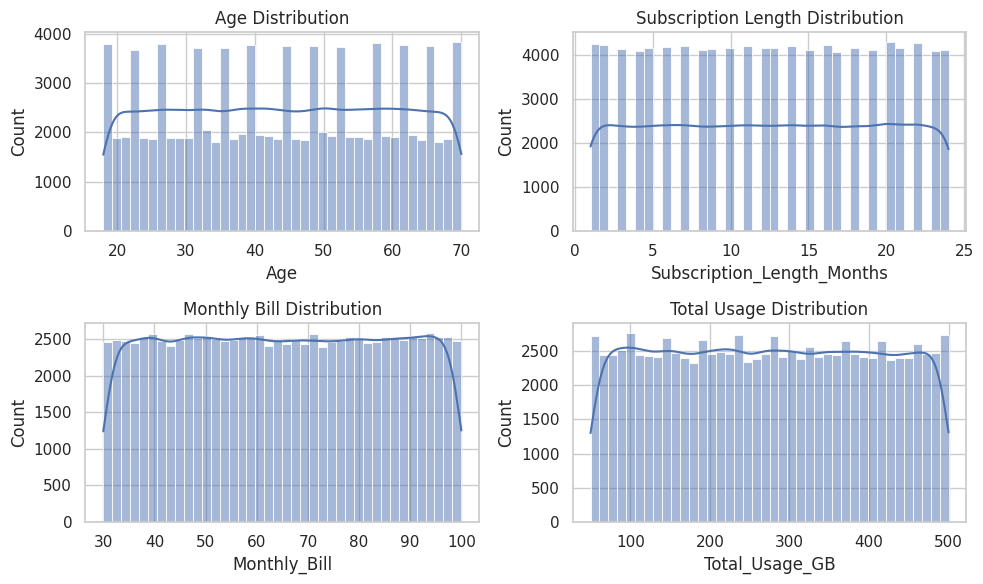

In [17]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plotting age distribution
sns.histplot(data_df['Age'], bins=40, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
# axes[0, 0].set_xlim(0, 150)  # Set custom y-axis range
# axes[0, 0].set_xlim(0, 70)  # Set custom x-axis range

# Plotting subscription length distribution
sns.histplot(data_df['Subscription_Length_Months'], bins=40, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Subscription Length Distribution')
# axes[0, 1].set_ylim(0, 150)  # Set custom y-axis range
# axes[0, 1].set_xlim(0, 24)   # Set custom x-axis range

# Plotting monthly bill distribution
sns.histplot(data_df['Monthly_Bill'], bins=40, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Monthly Bill Distribution')
# axes[1, 0].set_ylim(0, 250)  # Set custom y-axis range
# axes[1, 0].set_xlim(0, 100)  # Set custom x-axis range

# Plotting total usage distribution
sns.histplot(data_df['Total_Usage_GB'], bins=40, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Total Usage Distribution')
# axes[1, 1].set_ylim(0, 300)  # Set custom y-axis range
# axes[1, 1].set_xlim(0, 500)  # Set custom x-axis range

# Adjust layout
plt.tight_layout()
plt.show()

- **Age**: It is equally distributed from 18 to 70.
- **Subscription Length**: It is equally distributed from 1 to 24 months.
- **Monthly Bill**: It is equally distributed from 30 to 100.
- **Total Usage**: It is equally distributed from 50 to 500 GB.

## Categorical variable distribution

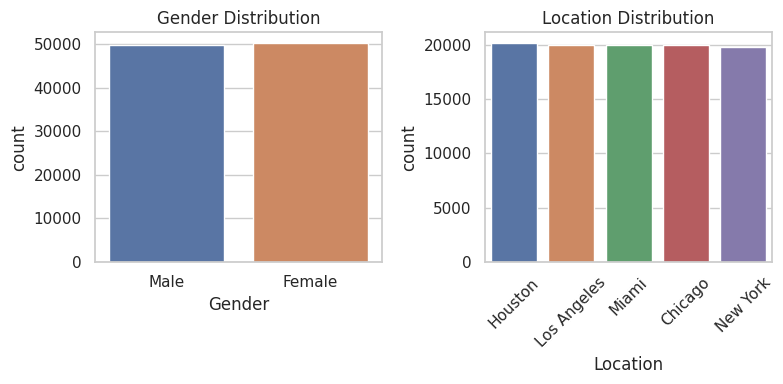

In [18]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Plotting gender distribution (bar plot)
sns.countplot(data=data_df, x='Gender', ax=axes[0])
axes[0].set_title('Gender Distribution')

# Plotting location distribution (bar plot)
sns.countplot(data=data_df, x='Location', ax=axes[1], order=data_df['Location'].value_counts().index)
axes[1].set_title('Location Distribution')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()

- **Gender** : Male and Female category is equally balanced.
- **Location** : All locations are equally balanced.

## Churn class distribution

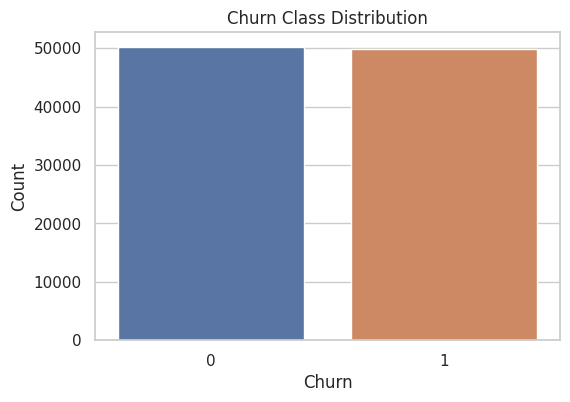

0    50.221
1    49.779
Name: Churn, dtype: float64


In [19]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plot the distribution of 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(data=data_df, x='Churn')
plt.title('Churn Class Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of each class
churn_percentages = data_df['Churn'].value_counts(normalize=True) * 100
print(churn_percentages)

Hmm. nice it is equally balanced

## churn counts for each feature using the groupby function and then print them one by one

In [20]:
# List of features for churn analysis
features = ['Age', 'Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Calculate churn counts for each feature
for feature in features:
    churn_counts = data_df.groupby(feature)['Churn'].value_counts().unstack(fill_value=0)
    print(f"Churn Counts based on {feature}:")
    print(churn_counts)
    print("-------------------------------")

Churn Counts based on Age:
Churn     0     1
Age              
18      900   939
19     1008   933
20      953   933
21      968   929
22      917   870
23      959   928
24      989   887
25      931   940
26      950   924
27      918  1006
28      932   949
29      958   927
30      970   905
31      935   966
32      876   934
33      996  1050
34      933   864
35      907   938
36      898   961
37      959   911
38      981   989
39      957   934
40      966   909
41      917  1022
42      986   944
43      907   956
44      968   948
45      924   903
46      942   923
47      924   923
48      961   934
49      963   891
50     1053   943
51      966   963
52      917   907
53      928   967
54      938   958
55      948   952
56      992   880
57      966   976
58      939   937
59      917  1011
60      957   947
61      973   936
62      920   947
63     1016   926
64      943   905
65      917   916
66      934   988
67      892   906
68      925   938
69      948   964
7

- if you can see Age = 18 is present in 0 and 1 in nearly equal propotionate,
and this is the case with other Age values which is bad indication for the data.
- In Gender male and female also present in 0, 1 in equal propotionate.
- location, Subscription_Length_Months, Total_Usage_GB, Monthly_Bill also have the same prolem is there like Gender and Age.

## calculate statistics (mean values) using groupby.

In [21]:
# List of features for analysis
features = ['Age', 'Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Calculate statistics for each feature
for feature in features:
    # Exclude non-numeric columns from aggregation
    numeric_features = [f for f in features if f != 'Gender' and f != 'Location']

    feature_stats = data_df.groupby(feature).agg({f: 'mean' for f in numeric_features})
    print(f"Statistics for {feature}:")
    print(feature_stats)
    print("========================================================================")

Statistics for Age:
      Age  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB
Age                                                                
18   18.0                   12.564981     65.601762      276.410549
19   19.0                   12.426069     64.132705      271.636270
20   20.0                   12.457582     64.802063      274.128314
21   21.0                   12.363205     64.689215      267.773326
22   22.0                   12.579183     64.302311      274.567991
23   23.0                   12.491256     64.782777      274.014308
24   24.0                   12.296908     65.687271      275.493603
25   25.0                   12.346339     64.952822      274.185462
26   26.0                   12.668623     65.210672      274.592850
27   27.0                   12.554054     65.482869      274.501559
28   28.0                   12.530037     65.366172      279.007974
29   29.0                   12.617507     64.754170      276.182493
30   30.0                   

You see the mean values of the features are almost same when we group the one feature.

## Relationship between Age and Churn

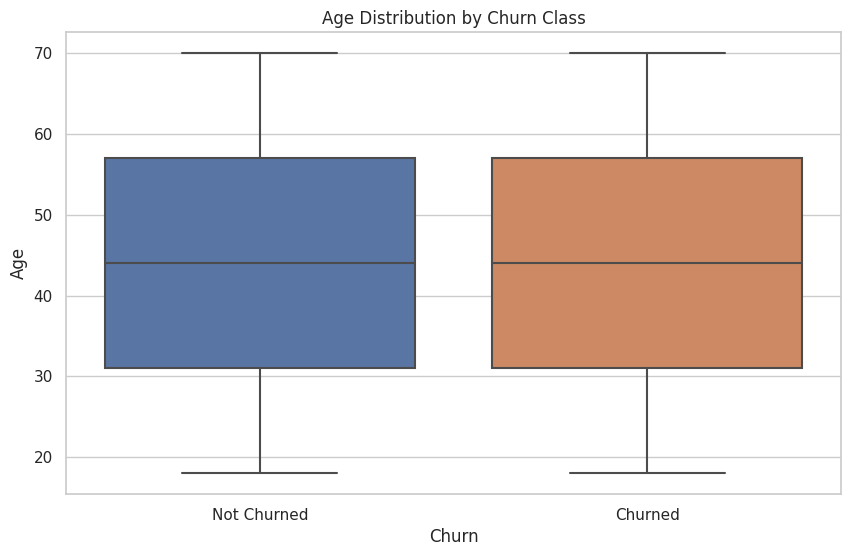

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_df, x='Churn', y='Age')
plt.title('Age Distribution by Churn Class')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

Age Samples are overlapping for churned and Not churned, not a good predictor.

## Relationship between Gender and Churn

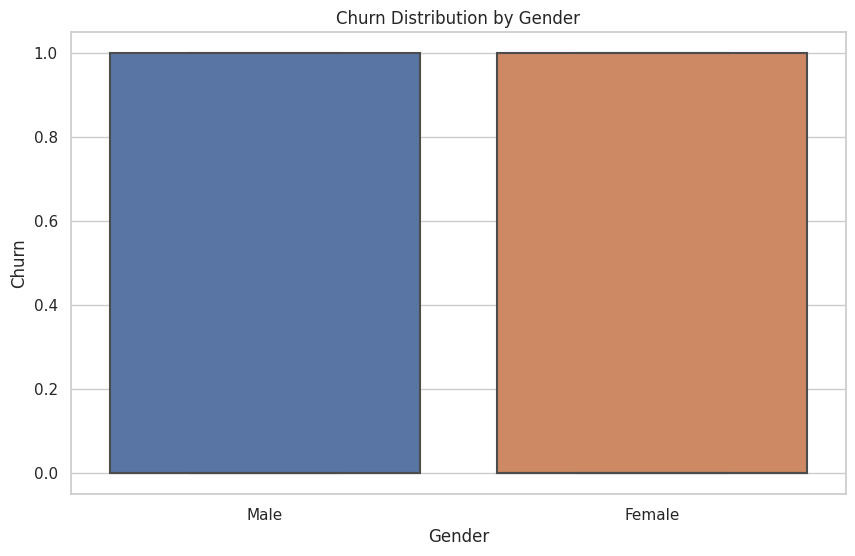

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_df, x='Gender', y='Churn')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn')
plt.show()

Gender Male and female categories are overlapping for churned and Not churned, not a good predictor.

## Relationship between Location and Churn

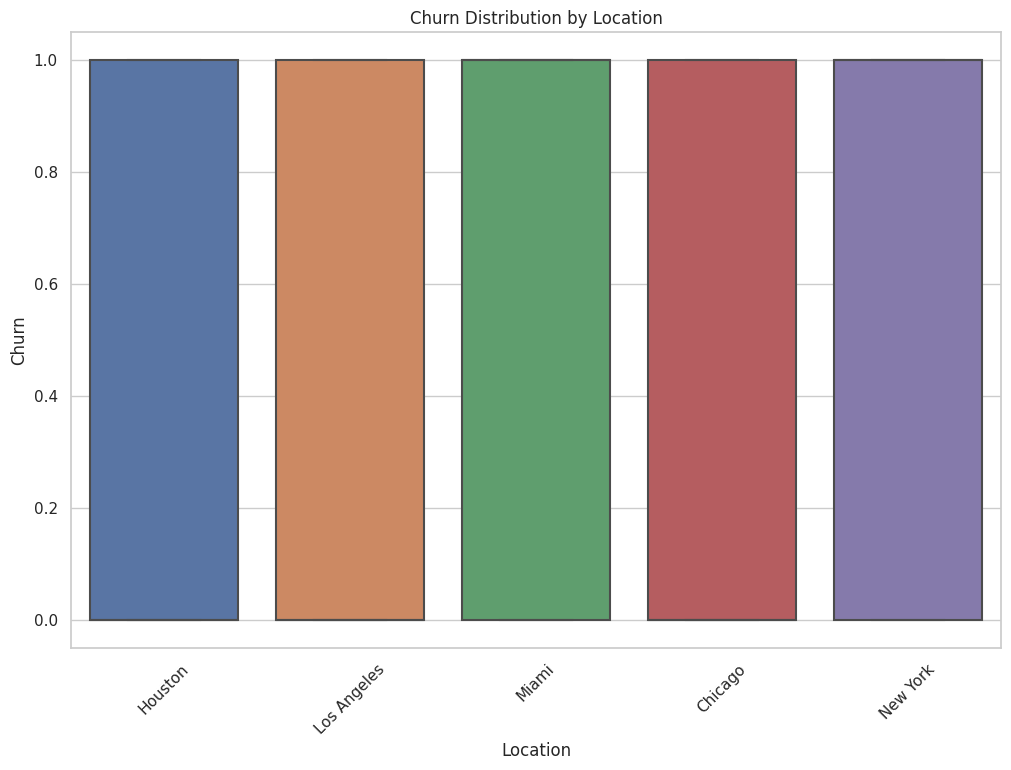

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_df, x='Location', y='Churn', order=data_df['Location'].value_counts().index)
plt.title('Churn Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Churn')
plt.xticks(rotation=45)
plt.show()

Location's categories are overlapping for churned and Not churned, not a good predictor.

## Relationship between Subscription_Length_Months and Churn

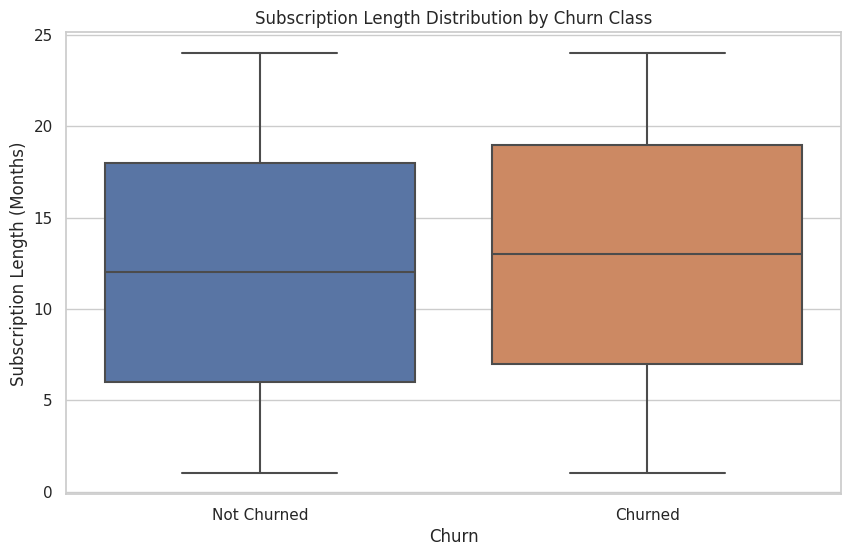

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_df, x='Churn', y='Subscription_Length_Months')
plt.title('Subscription Length Distribution by Churn Class')
plt.xlabel('Churn')
plt.ylabel('Subscription Length (Months)')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

Samples of Subscription Length are overlapping for churned and Not churned, not a good predictor.

## Relationship between Monthly_Bill and Churn

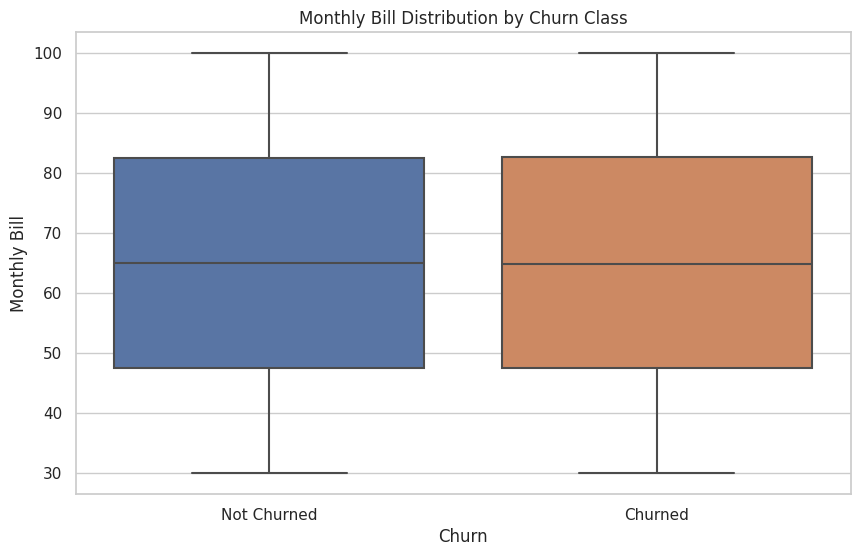

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_df, x='Churn', y='Monthly_Bill')
plt.title('Monthly Bill Distribution by Churn Class')
plt.xlabel('Churn')
plt.ylabel('Monthly Bill')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

Samples of monthly Bill are overlapping for churned and Not churned, not a good predictor.

## Relationship between Total_Usage_GB and Churn

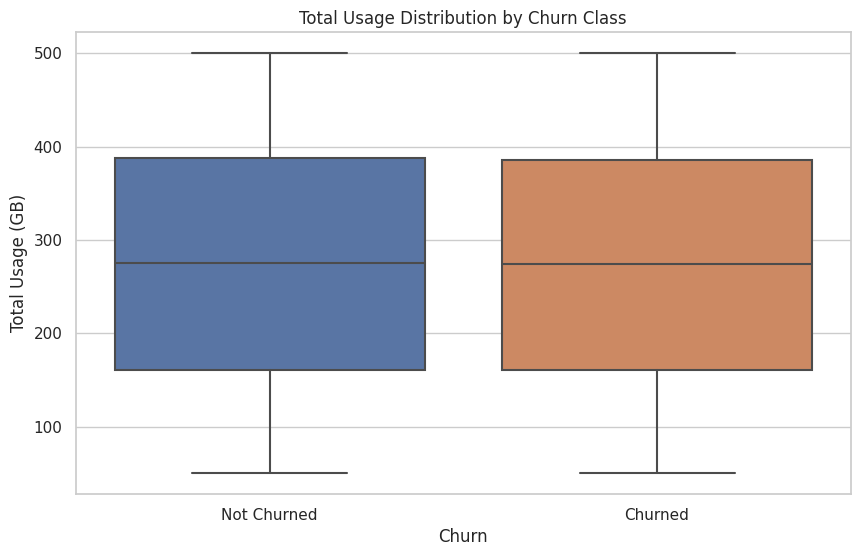

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_df, x='Churn', y='Total_Usage_GB')
plt.title('Total Usage Distribution by Churn Class')
plt.xlabel('Churn')
plt.ylabel('Total Usage (GB)')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

Samples of Total usage are overlapping for churned and Not churned, not a good predictor.

## Creating a scatter plot for a combination of categorical and numerical features along with color-coding based on 'Churn'

## Age

### Age vs. Gender

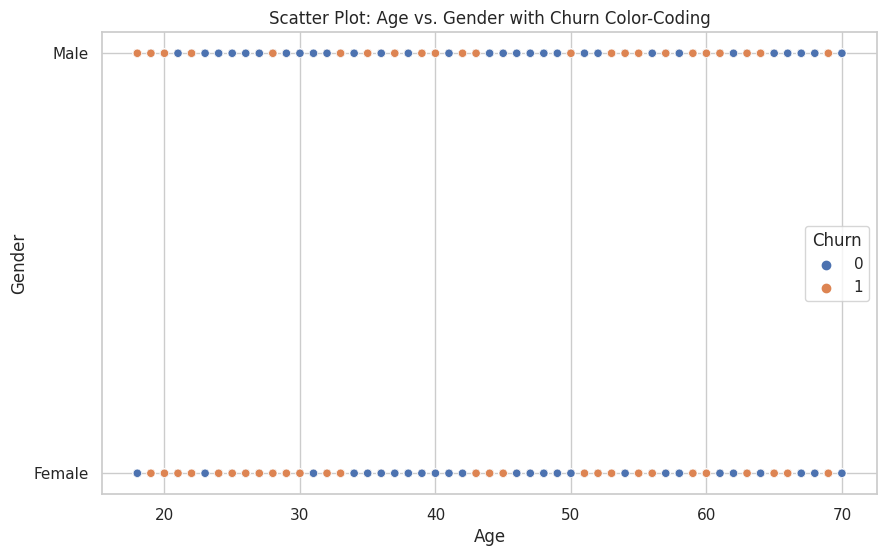

In [28]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot of Age vs. Gender with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Age', y='Gender', hue='Churn')
plt.title('Scatter Plot: Age vs. Gender with Churn Color-Coding')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.legend(title='Churn')
plt.show()

No sign of good predictor, you can see the mixture of 0,1 in both Male and female

### Age vs. Location

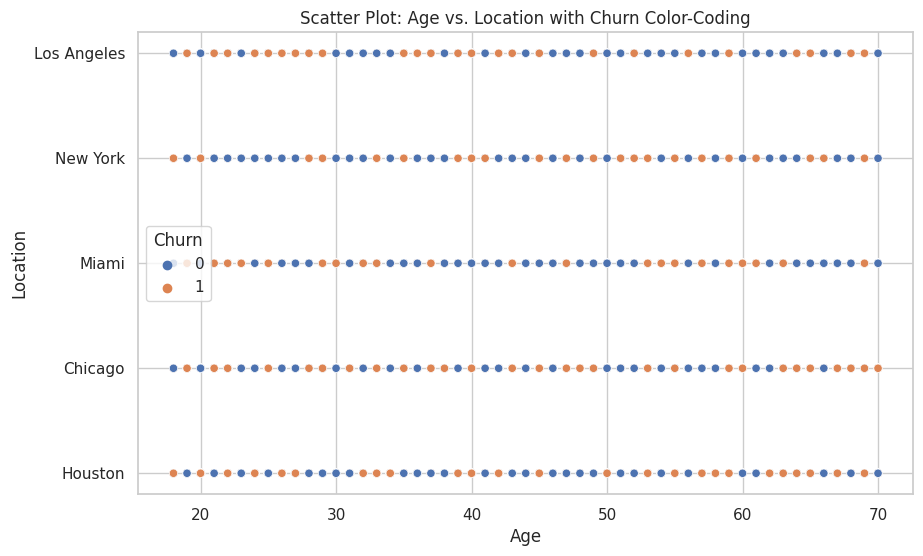

In [29]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot of Age vs. Location with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Age', y='Location', hue='Churn')
plt.title('Scatter Plot: Age vs. Location with Churn Color-Coding')
plt.xlabel('Age')
plt.ylabel('Location')
plt.legend(title='Churn')
plt.show()

Again overlapping 0,1

### Age vs. Subscription_Length_Months

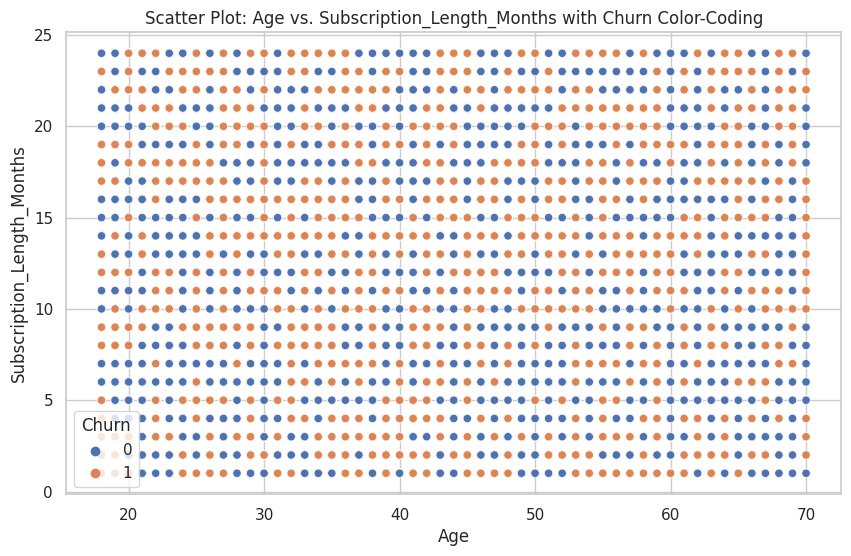

In [30]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot of Age vs. Subscription_Length_Months with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Age', y='Subscription_Length_Months', hue='Churn')
plt.title('Scatter Plot: Age vs. Subscription_Length_Months with Churn Color-Coding')
plt.xlabel('Age')
plt.ylabel('Subscription_Length_Months')
plt.legend(title='Churn')
plt.show()

overlapping

### Age vs. Monthly_Bill

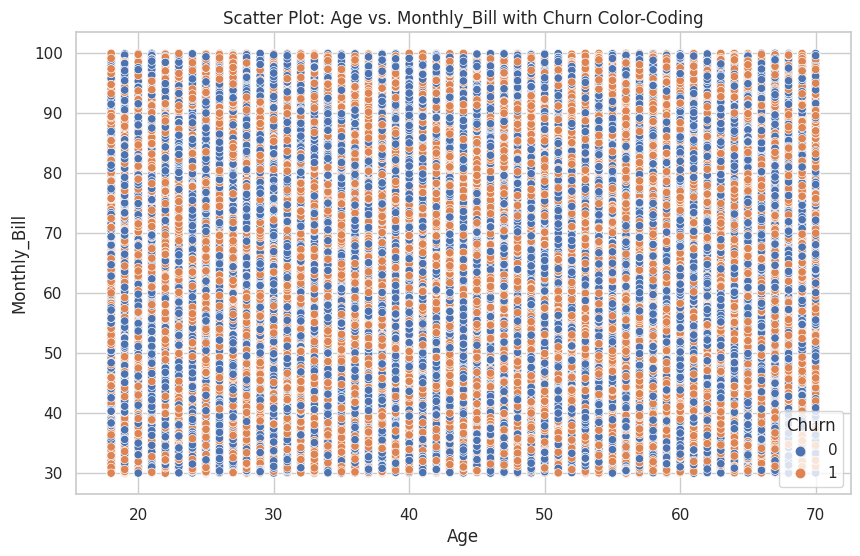

In [31]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot of Age vs. Monthly_Bill with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Age', y='Monthly_Bill', hue='Churn')
plt.title('Scatter Plot: Age vs. Monthly_Bill with Churn Color-Coding')
plt.xlabel('Age')
plt.ylabel('Monthly_Bill')
plt.legend(title='Churn')
plt.show()

overlapping

### Age vs. Total_Usage_GB

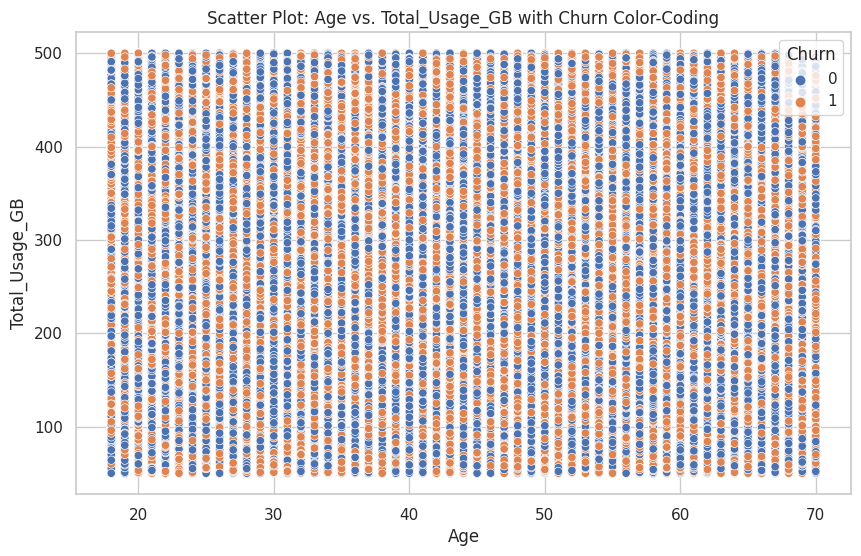

In [32]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot of Age vs. Total_Usage_GB with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Age', y='Total_Usage_GB', hue='Churn')
plt.title('Scatter Plot: Age vs. Total_Usage_GB with Churn Color-Coding')
plt.xlabel('Age')
plt.ylabel('Total_Usage_GB')
plt.legend(title='Churn')
plt.show()

overlapping

## Gender

### Gender vs. Location

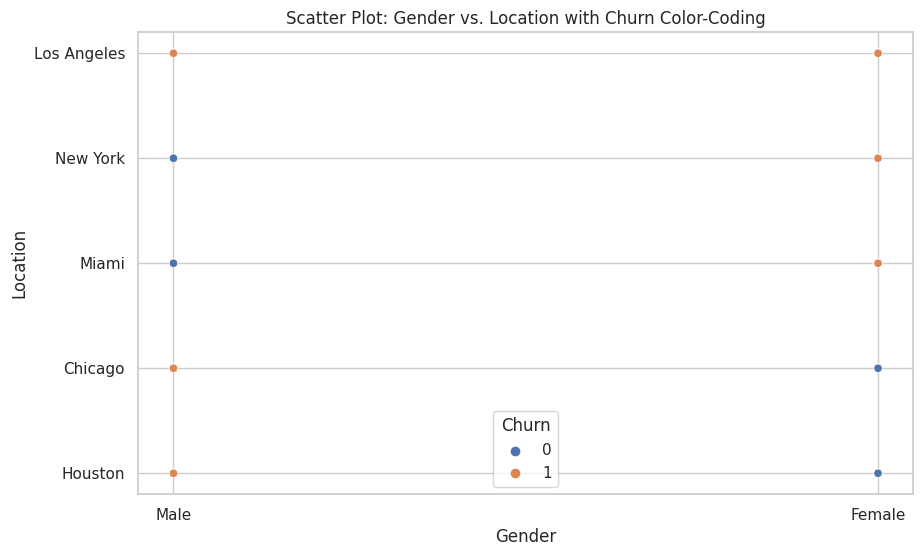

In [33]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot of Gender vs. Location with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Gender', y='Location', hue='Churn')
plt.title('Scatter Plot: Gender vs. Location with Churn Color-Coding')
plt.xlabel('Gender')
plt.ylabel('Location')
plt.legend(title='Churn')
plt.show()

Again no sign of a good separator.

### Gender vs. Subscription_Length_Months

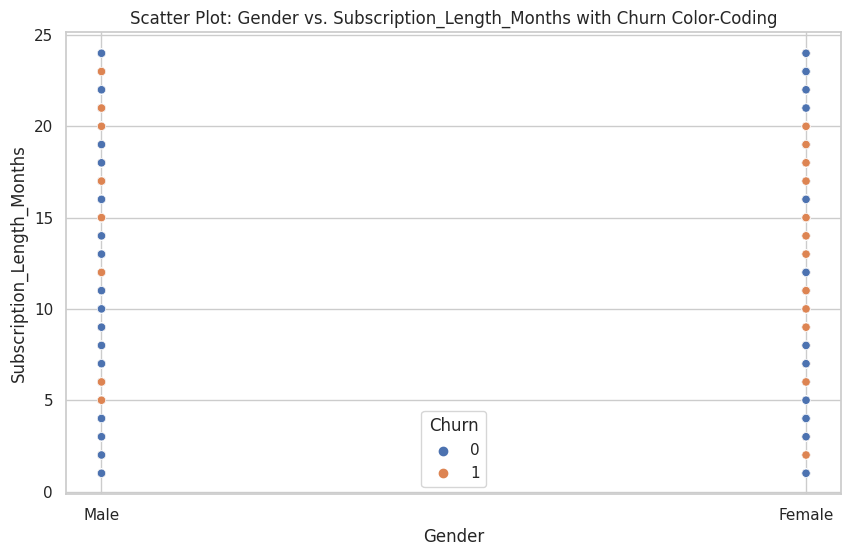

In [34]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot of Gender vs. Subscription_Length_Months with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Gender', y='Subscription_Length_Months', hue='Churn')
plt.title('Scatter Plot: Gender vs. Subscription_Length_Months with Churn Color-Coding')
plt.xlabel('Gender')
plt.ylabel('Subscription_Length_Months')
plt.legend(title='Churn')
plt.show()

Emmm, I can see little more blue dots in male than female, But I guess this is not enough.

### Gender vs. Monthly_Bill

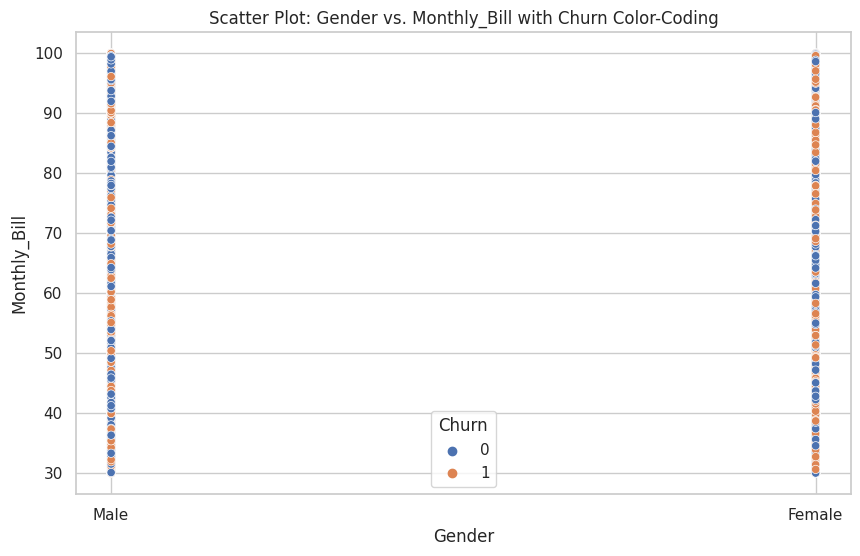

In [35]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot of Gender vs. Monthly_Bill with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Gender', y='Monthly_Bill', hue='Churn')
plt.title('Scatter Plot: Gender vs. Monthly_Bill with Churn Color-Coding')
plt.xlabel('Gender')
plt.ylabel('Monthly_Bill')
plt.legend(title='Churn')
plt.show()

overlapping

### Gender vs. Total_Usage_GB

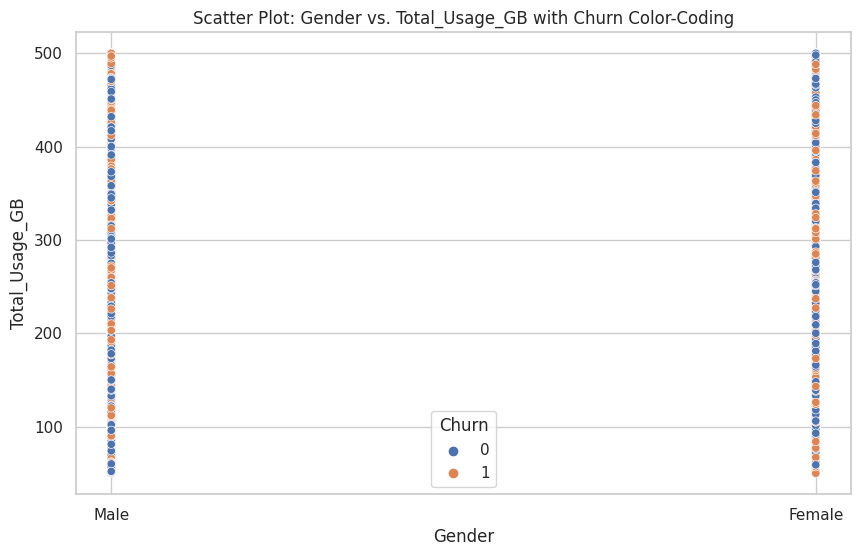

In [36]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot of Gender vs. Total_Usage_GB with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Gender', y='Total_Usage_GB', hue='Churn')
plt.title('Scatter Plot: Gender vs. Total_Usage_GB with Churn Color-Coding')
plt.xlabel('Gender')
plt.ylabel('Total_Usage_GB')
plt.legend(title='Churn')
plt.show()

overlapping

## Location

### Location vs. Subscription_Length_Months

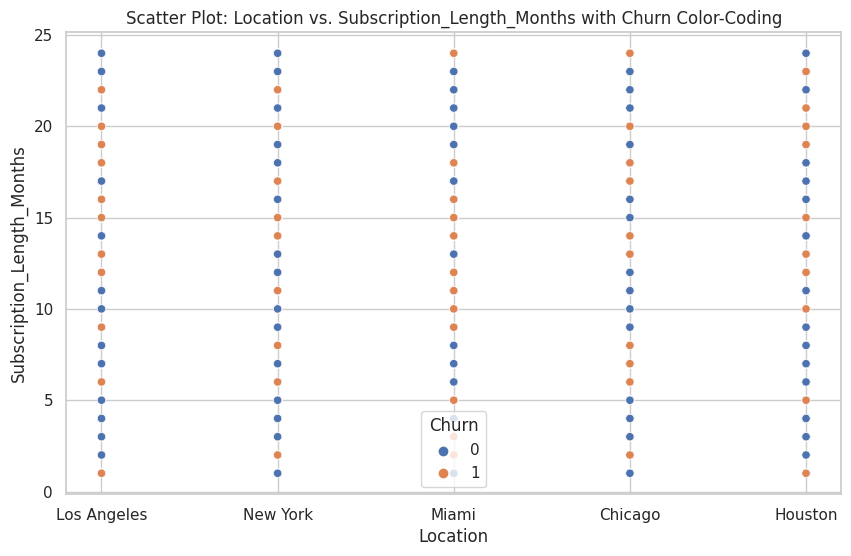

In [37]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot of Location vs. Subscription_Length_Months with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Location', y='Subscription_Length_Months', hue='Churn')
plt.title('Scatter Plot: Location vs. Subscription_Length_Months with Churn Color-Coding')
plt.xlabel('Location')
plt.ylabel('Subscription_Length_Months')
plt.legend(title='Churn')
plt.show()

overlapping

### Location vs. Monthly_Bill

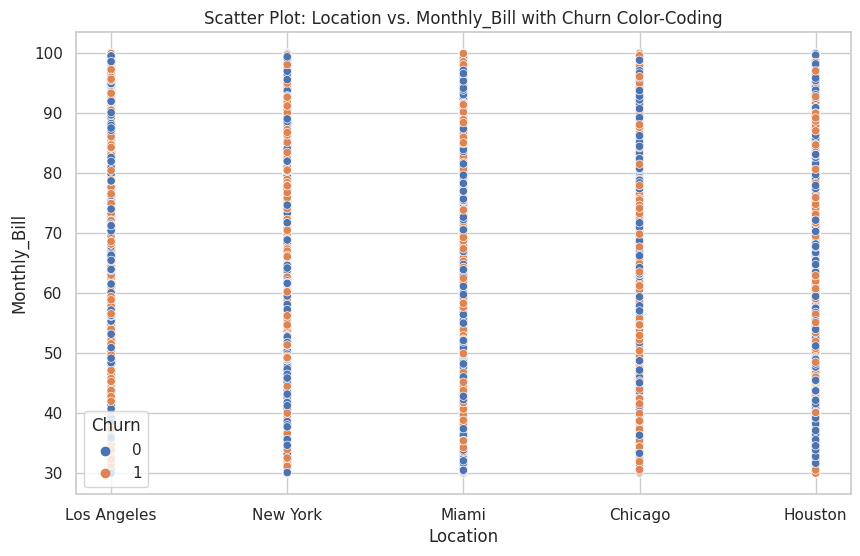

In [38]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot of Location vs. Monthly_Bill with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Location', y='Monthly_Bill', hue='Churn')
plt.title('Scatter Plot: Location vs. Monthly_Bill with Churn Color-Coding')
plt.xlabel('Location')
plt.ylabel('Monthly_Bill')
plt.legend(title='Churn')
plt.show()

overlapping

### Location vs. Total_Usage_GB

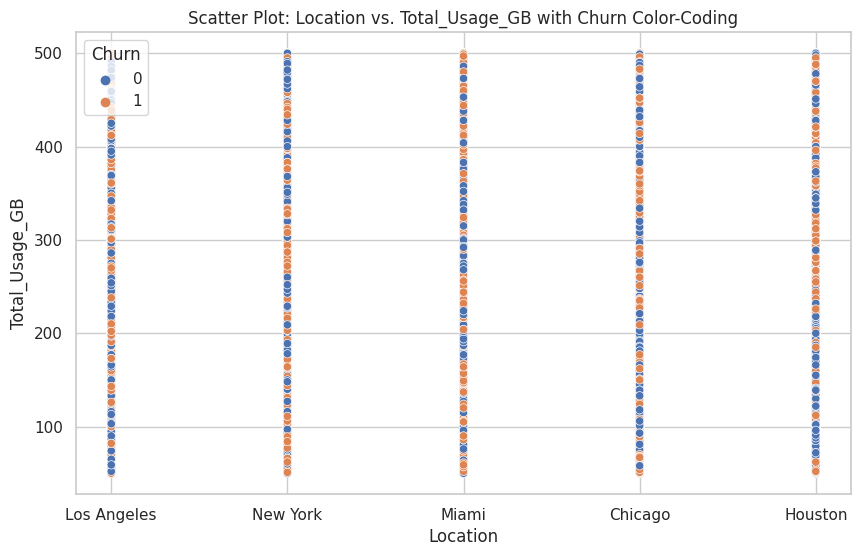

In [39]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot of Location vs. Total_Usage_GB with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Location', y='Total_Usage_GB', hue='Churn')
plt.title('Scatter Plot: Location vs. Total_Usage_GB with Churn Color-Coding')
plt.xlabel('Location')
plt.ylabel('Total_Usage_GB')
plt.legend(title='Churn')
plt.show()

overlapping

## Subscription_Length_Months

### Subscription_Length_Months vs. Monthly_Bill

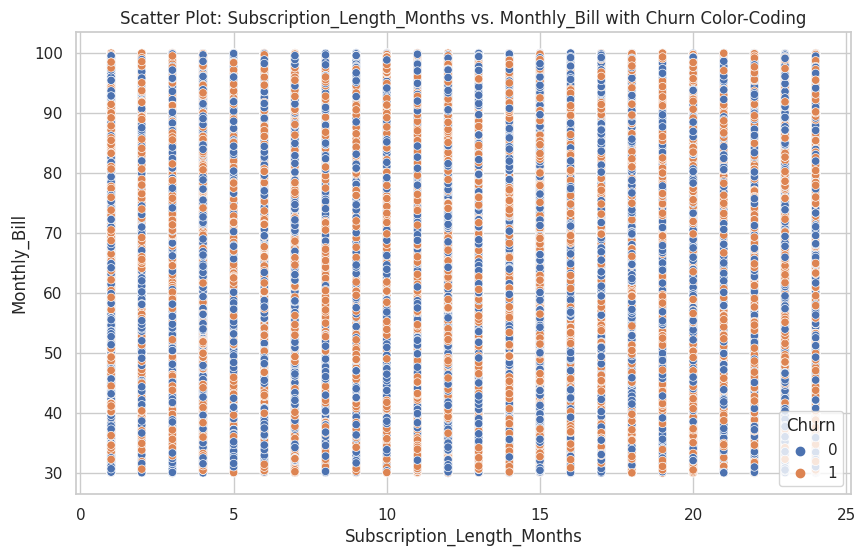

In [40]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot of Subscription_Length_Months vs. Monthly_Bill with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Subscription_Length_Months', y='Monthly_Bill', hue='Churn')
plt.title('Scatter Plot: Subscription_Length_Months vs. Monthly_Bill with Churn Color-Coding')
plt.xlabel('Subscription_Length_Months')
plt.ylabel('Monthly_Bill')
plt.legend(title='Churn')
plt.show()

overlapping

### Subscription_Length_Months vs. Total_Usage_GB

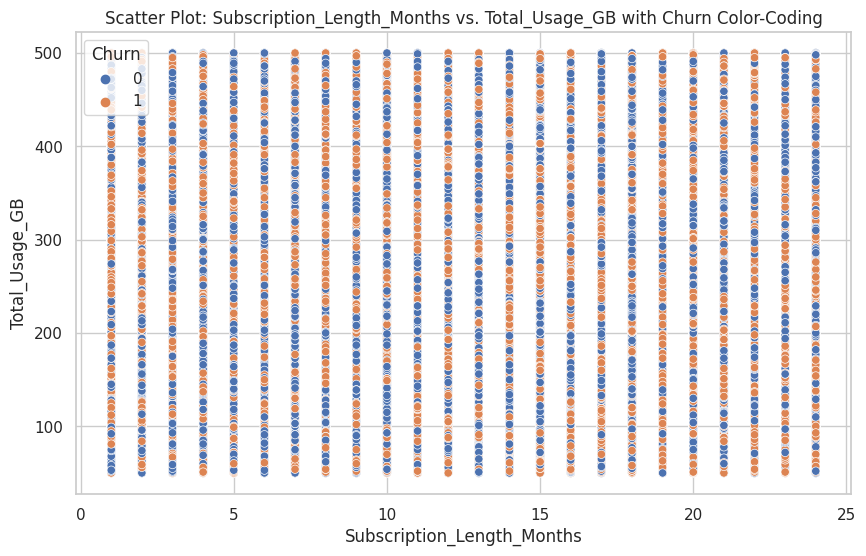

In [41]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot of Subscription_Length_Months vs. Total_Usage_GB with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Subscription_Length_Months', y='Total_Usage_GB', hue='Churn')
plt.title('Scatter Plot: Subscription_Length_Months vs. Total_Usage_GB with Churn Color-Coding')
plt.xlabel('Subscription_Length_Months')
plt.ylabel('Total_Usage_GB')
plt.legend(title='Churn')
plt.show()

overlapping

## Monthly_Bill

### Monthly_Bill vs. Total_Usage_GB

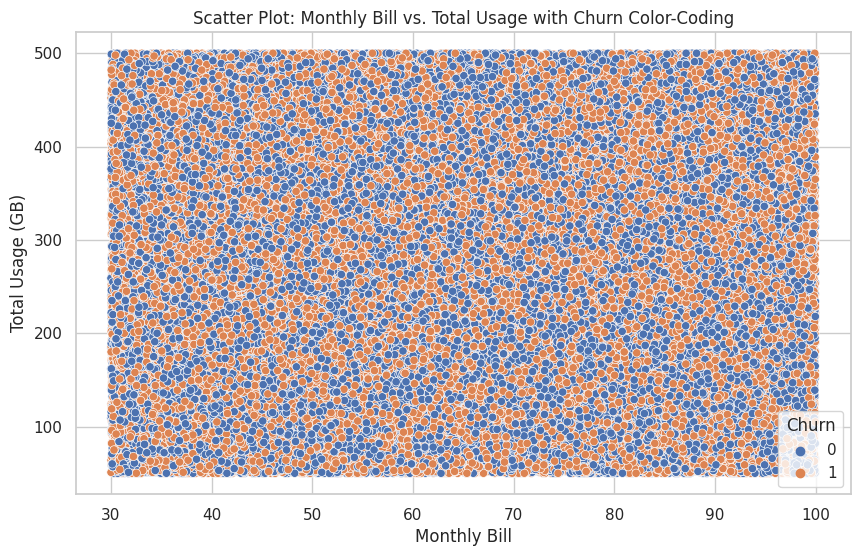

In [42]:
# Create a scatter plot of Monthly_Bill vs. Total_Usage_GB with respect to Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='Monthly_Bill', y='Total_Usage_GB', hue='Churn')
plt.title('Scatter Plot: Monthly Bill vs. Total Usage with Churn Color-Coding')
plt.xlabel('Monthly Bill')
plt.ylabel('Total Usage (GB)')
plt.legend(title='Churn')
plt.show()

overplapping

## Eda conclusion

All the features are very very bad predictor for Churn, we have to do something extra ordinary to create some good predictor, we will try do some feature engineering lets hope for good results.

# Feature Engineering

In [95]:
# Save the copy of data_df to modified_data_df DataFrame in order to do feature engineering.
modified_data_df = data_df.copy()

### Age bins

In [96]:
# Define age bins and labels
age_bins = [18, 30, 40, 50, 60, 71]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-79']

# Create a new column 'Age_Bin' based on age bins
modified_data_df['Age_Bin'] = pd.cut(modified_data_df['Age'], bins=age_bins, labels=age_labels, right=False)

In [97]:
#encode the labels
bins_to_labels = {
    '18-29': 0,
    '30-39': 1,
    '40-49': 2,
    '50-59': 3,
    '60-79': 4
}

modified_data_df['Age_Bin'] = modified_data_df['Age_Bin'].map(bins_to_labels)

### Gender encoding

In [98]:
#encode the labels
gender_to_label = {
    'Female' : 0,
    'Male' : 1
}

modified_data_df['Gender'] = modified_data_df['Gender'].map(gender_to_label)

### Location encoding

In [99]:
# Define a dictionary to map locations to regions
location_to_region = {
    'Chicago': 0,
    'Houston': 1,
    'Los Angeles': 2,
    'Miami': 3,
    'New York': 4
}

modified_data_df['Location'] = modified_data_df['Location'].map(location_to_region)

### Subscription Length Ratio to age

In [100]:
# Calculate the ratio of subscription length to age
modified_data_df['Subscription_Length_Ratio_age'] = modified_data_df['Subscription_Length_Months'] / modified_data_df['Age']

### ratio of total usage to monthly bill

In [101]:
# Calculate the ratio of total usage to monthly bill
modified_data_df['Usage_per_Billing'] = modified_data_df['Total_Usage_GB'] / modified_data_df['Monthly_Bill']

### total bill

In [102]:
# Calculate the total bill by multiplying subscription length with monthly bill
modified_data_df['Total_Bill'] = modified_data_df['Subscription_Length_Months'] * modified_data_df['Monthly_Bill']

### multiplying age and subscription length

In [103]:
# Create a new feature by multiplying age and subscription length
modified_data_df['Age_Subscription_Length'] = modified_data_df['Age'] * modified_data_df['Subscription_Length_Months']

### total usage by age

In [104]:
# Create a new feature by dividing total usage by age
modified_data_df['Usage_per_Age'] = modified_data_df['Total_Usage_GB'] / modified_data_df['Age']

### Usage Ratio to Total Bill

In [105]:
modified_data_df['Usage_Ratio_to_Total_Bill'] = modified_data_df['Total_Usage_GB'] / modified_data_df['Total_Bill']

### Usage per Subscription Length

In [106]:
modified_data_df['Usage_per_Subscription_Length'] = modified_data_df['Total_Usage_GB'] / modified_data_df['Subscription_Length_Months']

### Usage per Bill

In [107]:
modified_data_df['Usage_per_Bill'] = modified_data_df['Total_Usage_GB'] / modified_data_df['Monthly_Bill']

### Billing Efficiency

In [108]:
modified_data_df['Billing_Efficiency'] = modified_data_df['Monthly_Bill'] / modified_data_df['Subscription_Length_Months']

### Location-Based Billing Average

In [109]:
location_billing_avg = modified_data_df.groupby('Location')['Monthly_Bill'].mean()
modified_data_df['Location_Billing_Avg'] = modified_data_df['Location'].map(location_billing_avg)

### Location Usage Average

In [110]:
location_usage_avg = modified_data_df.groupby('Location')['Total_Usage_GB'].mean()
modified_data_df['Location_Usage_Avg'] = modified_data_df['Location'].map(location_usage_avg)

### Usage to Subscription Length Ratio:

In [111]:
modified_data_df['Usage_to_Subscription_Length_Ratio'] = modified_data_df['Total_Usage_GB'] / modified_data_df['Subscription_Length_Months']

### Age-Based Billing Deviation

In [112]:
age_billing_avg = modified_data_df.groupby('Age_Bin')['Monthly_Bill'].transform('mean')
modified_data_df['Age_Billing_Deviation'] = modified_data_df['Monthly_Bill'] - age_billing_avg

### Location Subscription Duration

In [113]:
location_sub_length_avg = modified_data_df.groupby('Location')['Subscription_Length_Months'].mean()
modified_data_df['Location_Subscription_Length_Avg'] = modified_data_df['Location'].map(location_sub_length_avg)

### Total Bill per Usage

In [114]:
modified_data_df['Total_Bill_per_Usage'] = modified_data_df['Total_Bill'] / modified_data_df['Total_Usage_GB']

### Normalized Age:

In [115]:
min_age = modified_data_df['Age'].min()
max_age = modified_data_df['Age'].max()
modified_data_df['Normalized_Age'] = (modified_data_df['Age'] - min_age) / (max_age - min_age)

In [ ]:
modified_data_df

In [136]:
# modified_data_df.to_csv('churn_FE.csv', index=False)

# Data Preprocessing

In [118]:
data_pre = modified_data_df.copy()

In [119]:
data_pre = data_pre.drop(['CustomerID', 'Name'], axis=1)

### missing values

In [120]:
# Check for missing values
missing_values = data_pre.isnull().sum()

# Calculate the percentage of missing values for each column
percent_missing = (missing_values / len(data_pre)) * 100

# Combine missing values and percent missing into a DataFrame
missing_data = pd.DataFrame({
    'Missing_Values': missing_values,
    'Percent_Missing': percent_missing
})

# Print the missing data
missing_data

Missing_Values  Percent_Missing
Age                                              0              0.0
Gender                                           0              0.0
Location                                         0              0.0
Subscription_Length_Months                       0              0.0
Monthly_Bill                                     0              0.0
Total_Usage_GB                                   0              0.0
Churn                                            0              0.0
Age_Bin                                          0              0.0
Subscription_Length_Ratio_age                    0              0.0
Usage_per_Billing                                0              0.0
Total_Bill                                       0              0.0
Age_Subscription_Length                          0              0.0
Usage_per_Age                                    0              0.0
Usage_Ratio_to_Total_Bill                        0              0.0
Usage_per_Subscription_Length                    0              0.0
Usage_per_Bill                                   0              0.0
Billing_Efficiency                               0              0.0
Location_Billing_Avg                             0              0.0
Location_Usage_Avg                               0              0.0
Usage_to_Subscription_Length_Ratio               0              0.0
Age_Billing_Deviation                            0              0.0
Location_Subscription_Length_Avg                 0              0.0
Total_Bill_per_Usage                             0              0.0
Normalized_Age                                   0              0.0

### Encoding categorical features
(already encoded in FE section)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # List of data types considered categorical
# categorical_data_types = ['object', 'category']

# # Identify columns with categorical data types
# categorical_columns = data_pre.select_dtypes(include=categorical_data_types).columns.tolist()

# # Apply label encoding to each categorical column
# for col in categorical_columns:
#     data_pre[col] = label_encoder.fit_transform(data_pre[col])

### Scaling Features

In [ ]:
data_pre.columns

In [124]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# List of numerical columns to scale
numerical_columns = ['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Age_Bin',
       'Subscription_Length_Ratio_age', 'Usage_per_Billing', 'Total_Bill',
       'Age_Subscription_Length', 'Usage_per_Age', 'Usage_Ratio_to_Total_Bill',
       'Usage_per_Subscription_Length', 'Usage_per_Bill', 'Billing_Efficiency',
       'Location_Billing_Avg', 'Location_Usage_Avg',
       'Usage_to_Subscription_Length_Ratio', 'Age_Billing_Deviation',
       'Location_Subscription_Length_Avg', 'Total_Bill_per_Usage',
       'Normalized_Age']

# Apply standardization to each numerical column
data_pre[numerical_columns] = scaler.fit_transform(data_pre[numerical_columns])

# Data preparation for model

### Separate features and target variable

In [125]:
# Separate features and target variable
X = data_pre.drop(['Churn'], axis=1)  # Features
y = data_pre['Churn']  # Target variable

In [135]:
X.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Age_Bin',
       'Subscription_Length_Ratio_age', 'Usage_per_Billing', 'Total_Bill',
       'Age_Subscription_Length', 'Usage_per_Age', 'Usage_Ratio_to_Total_Bill',
       'Usage_per_Subscription_Length', 'Usage_per_Bill', 'Billing_Efficiency',
       'Location_Billing_Avg', 'Location_Usage_Avg',
       'Usage_to_Subscription_Length_Ratio', 'Age_Billing_Deviation',
       'Location_Subscription_Length_Avg', 'Total_Bill_per_Usage',
       'Normalized_Age'],
      dtype='object')

### splitting data into test and train

In [126]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000, 23)
y_train shape: (80000,)
X_test shape: (20000, 23)
y_test shape: (20000,)


# Apply Model and save Model

### 1. Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5039
Precision: 0.49993529183382945
Recall: 0.3893760709605886
F1 Score: 0.4377833182230281
ROC AUC Score: 0.5030023523768119


1. **Accuracy: 0.504**
   - The model's accuracy is approximately 50.4%, which means that around 50.4% of the predictions made by the model are correct.

2. **Precision: 0.5000646579593948**
   - The precision is approximately 50.0%. It indicates that when the model predicts a customer will churn, it's correct about 50.0% of the time.

3. **Recall: 0.38977925612337466**
   - The recall is approximately 38.98%. It means that the model correctly identifies about 38.98% of the actual churn cases.

4. **F1 Score: 0.438087685510366**
   - The F1 score is approximately 0.438, which indicates a balance between precision and recall.

5. **ROC AUC Score: 0.5031047287661222**
   - The ROC AUC score is approximately 0.503, which suggests that the model's ability to distinguish between classes is only slightly better than random chance.

Overall, these metrics indicate that the model's performance is not very strong. The accuracy is close to random guessing

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[6213 3866]
 [6054 3867]]


- The top-left cell (6213) represents the number of true negatives (TN), meaning the model correctly predicted not churned when the actual class was not churned.
- The top-right cell (3866) represents the number of false positives (FP), meaning the model incorrectly predicted churned when the actual class was not churned.
- The bottom-left cell (6054) represents the number of false negatives (FN), meaning the model incorrectly predicted not churned when the actual class was churned.
- The bottom-right cell (3867) represents the number of true positives (TP), meaning the model correctly predicted churned when the actual class was churned.

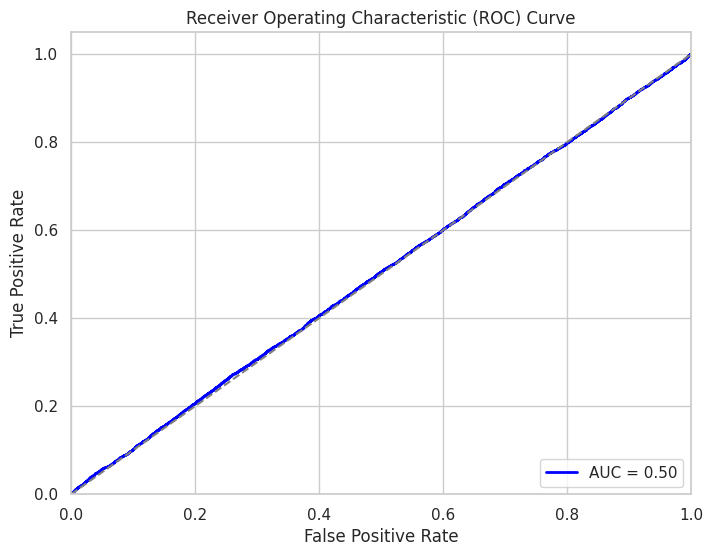

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pickle

# Save the model to a file
with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg_model, file)

### 2. XGBoost

In [130]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    n_estimators=100,             # Number of boosting rounds (trees)
    learning_rate=0.1,            # Step size for weight updates
    max_depth=3,                  # Maximum depth of each tree
    random_state=42               # Seed for reproducibility
)

# Train the XGBoost classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score: {roc_auc:.2f}")

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.50
AUC-ROC Score: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55     10079
           1       0.50      0.40      0.44      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Confusion Matrix:
 [[6000 4079]
 [5916 4005]]


1. **Accuracy**: An accuracy of 0.50 indicates that the model's predictions are on par with random guessing. this means the model is not effectively distinguishing between churn and non-churn customers.

2. **AUC-ROC Score**: With an AUC-ROC score of 0.50, the model's ability to differentiate between churn and non-churn customers is similar to random chance. This suggests that the model's predicted probabilities for churn and non-churn are not good or discriminative.

3. **Classification Report**:
   - **Precision**: The precision values of 0.50 for both classes mean that when the model predicts a customer will churn (positive class) or not churn (negative class), it is equally likely to be correct for both cases. This could indicate that the model's decision boundary is not effectively separating the two classes.
   - **Recall**: The recall values of 0.60 for non-churn (class 0) and 0.40 for churn (class 1) imply that the model is better at identifying customers who will not churn. However, it's less effective at identifying customers who will actually churn. This could suggest that the model is biased toward the majority class (non-churn).
   - **F1-score**: The F1-scores of 0.55 for non-churn and 0.44 for churn further highlight the model's struggle to balance precision and recall for both classes.

4. **Support**: The support values (number of instances) for each class indicate that the dataset has a roughly equal number of both churn and non-churn instances. This suggests that class imbalance is not the primary issue affecting the model's performance.

let's interpret the confusion matrix in the context of your churn prediction problem

```
[[6000 4079]
 [5916 4005]]
```

Here's the breakdown:

- **True Negatives (TN)**: 6000 - This represents the number of instances that were correctly predicted as "non-churn" (class 0). In the context of your churn prediction, these are customers who were correctly identified as not likely to churn.

- **False Positives (FP)**: 4079 - This represents the number of instances that were predicted as "churn" (class 1), but actually belong to the "non-churn" (class 0) category. In other words, these are cases where the model falsely identified customers as likely to churn when they didn't.

- **False Negatives (FN)**: 5916 - This is the number of instances that were predicted as "non-churn" (class 0), but actually belong to the "churn" (class 1) category. These are instances where the model failed to identify customers who actually ended up churning.

- **True Positives (TP)**: 4005 - These are instances that were correctly predicted as "churn" (class 1). In the context of churn prediction, these are customers who were correctly identified as likely to churn.

To summarize:

- True Negatives (TN): 6000 - Correctly predicted "non-churn" customers.
- False Positives (FP): 4079 - Incorrectly predicted "churn" when it's actually "non-churn".
- False Negatives (FN): 5916 - Incorrectly predicted "non-churn" when it's actually "churn".
- True Positives (TP): 4005 - Correctly predicted "churn" customers.


In [131]:
# You can also access feature importances using xgb_classifier.feature_importances_

# You can save the trained model using joblib or pickle for later use
import joblib
joblib.dump(xgb_classifier, 'xgb_classifier_model.pkl')

['xgb_classifier_model.pkl']

### 3. XGBoost cv

In [132]:
from sklearn.model_selection import cross_val_score, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Initialize the XGBoost classifier
xgb_classifier_cv = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    n_estimators=500,             # Number of boosting rounds (trees)
    learning_rate=0.01,            # Step size for weight updates
    max_depth=5,                  # Maximum depth of each tree
    random_state=42               # Seed for reproducibility
)

# Define the scoring metric (in this case, accuracy)
scoring = make_scorer(accuracy_score)

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_classifier_cv, X_train, y_train, cv=5, scoring=scoring)

# Print cross-validation scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Calculate and print mean and standard deviation of cross-validation scores
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Accuracy:", np.std(cv_scores))

xgb_classifier_cv.fit(X_train, y_train)

y_test_pred = xgb_classifier_cv.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, xgb_classifier_cv.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score: {roc_auc:.2f}")

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Cross-Validation Scores: [0.501875  0.5006875 0.496     0.5009375 0.4994375]
Mean Accuracy: 0.49978749999999994
Standard Deviation of Accuracy: 0.00204733057907119
Accuracy: 0.50
AUC-ROC Score: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55     10079
           1       0.50      0.40      0.44      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Confusion Matrix:
 [[6000 4079]
 [5916 4005]]


same as before